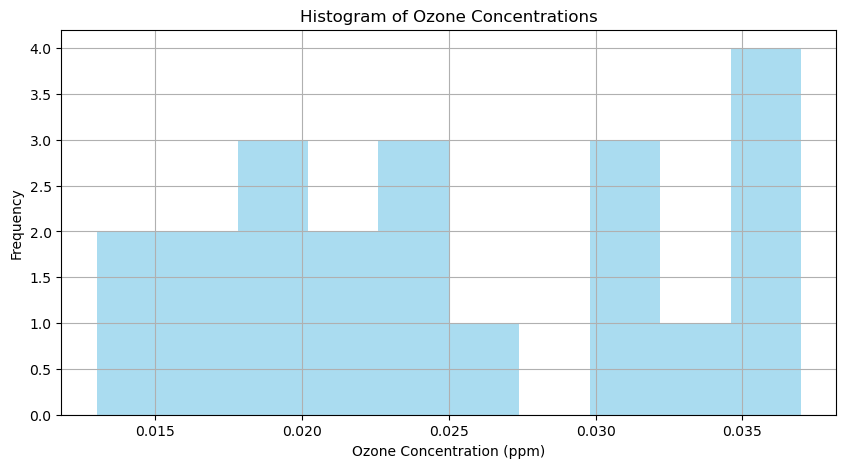

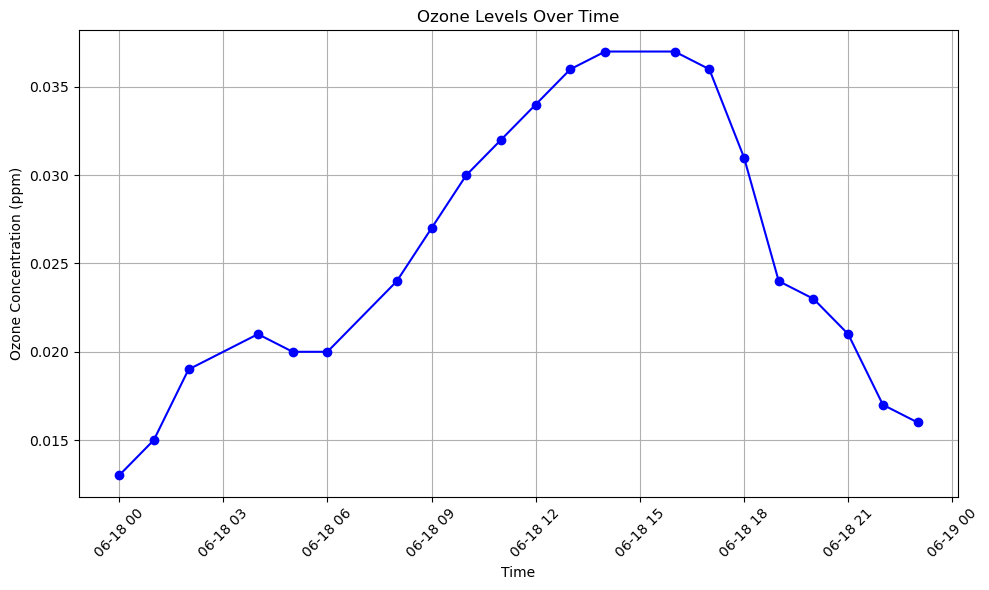

('This histogram shows the distribution of ozone concentrations measured throughout the day, helping identify common concentration levels and their frequency.',
 'The line plot illustrates the change in ozone concentration over time. It highlights how ozone levels vary within a single day, peaking typically in the mid-afternoon and providing insights into daily variations.',
 'Statistical Summary provides key metrics such as mean, standard deviation, minimum, and maximum values of ozone concentrations, offering a quick overview of data spread and central tendency.',
 count    21.000000
 mean      0.025381
 std       0.007858
 min       0.013000
 25%       0.020000
 50%       0.024000
 75%       0.032000
 max       0.037000
 Name: sample_measurement, dtype: float64)

In [26]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON data from the file
with open('bySite.json', 'r') as file:
    data = json.load(file)

# Transform the JSON data into a DataFrame
df = pd.DataFrame(data['Data'])

# Check and convert date and time strings into datetime objects
if 'date_local' in df.columns and 'time_local' in df.columns:
    df['datetime_local'] = pd.to_datetime(df['date_local'] + ' ' + df['time_local'], errors='coerce')

# Convert sample measurements to numeric, handling non-numeric gracefully
df['sample_measurement'] = pd.to_numeric(df['sample_measurement'], errors='coerce')

# Remove any rows with NaN values in 'sample_measurement' after conversion
df_clean = df.dropna(subset=['sample_measurement'])

# Plotting and summarizing data
# Histogram for Ozone Concentrations
plt.figure(figsize=(10, 5))
plt.hist(df_clean['sample_measurement'], bins=10, color='skyblue', alpha=0.7)
plt.title('Histogram of Ozone Concentrations')
plt.xlabel('Ozone Concentration (ppm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
description_hist = "This histogram shows the distribution of ozone concentrations measured throughout the day, helping identify common concentration levels and their frequency."

# Line plot for ozone concentration over time
plt.figure(figsize=(10, 6))
plt.plot(df_clean['datetime_local'], df_clean['sample_measurement'], marker='o', linestyle='-', color='b')
plt.title('Ozone Levels Over Time')
plt.xlabel('Time')
plt.ylabel('Ozone Concentration (ppm)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
description_line_plot = "The line plot illustrates the change in ozone concentration over time. It highlights how ozone levels vary within a single day, peaking typically in the mid-afternoon and providing insights into daily variations."

# Generate statistical summary of the clean data
stat_summary = df_clean['sample_measurement'].describe()
description_stats = "Statistical Summary provides key metrics such as mean, standard deviation, minimum, and maximum values of ozone concentrations, offering a quick overview of data spread and central tendency."

# Output descriptions and statistics
(description_hist, description_line_plot, description_stats, stat_summary)


In [21]:
print(df)


   state_code county_code site_number parameter_code  poc   latitude  \
0          37         183        0014          44201    1  35.856111   
1          37         183        0014          44201    1  35.856111   
2          37         183        0014          44201    1  35.856111   
3          37         183        0014          44201    1  35.856111   
4          37         183        0014          44201    1  35.856111   
5          37         183        0014          44201    1  35.856111   
6          37         183        0014          44201    1  35.856111   
7          37         183        0014          44201    1  35.856111   
8          37         183        0014          44201    1  35.856111   
9          37         183        0014          44201    1  35.856111   
10         37         183        0014          44201    1  35.856111   
11         37         183        0014          44201    1  35.856111   
12         37         183        0014          44201    1  35.85

In [33]:
# Simulated data extraction based on the schema
data = {
    "monitoringLocationData": [
        {
            "unitId": "001",
            "activeDate": "2021-01-01",
            "retireDate": "2021-12-31",
            "nonLoadBasedIndicator": 1,
            "stackPipeId": "SP001"
        }
    ],
    "monitoringPlanCommentData": [
        {
            "monitoringPlanComment": "Routine annual inspection completed.",
            "beginDate": "2021-01-01",
            "endDate": "2021-01-02"
        }
    ]
}


In [34]:
import pandas as pd

# Convert the nested data into a pandas DataFrame
df_monitoring_location = pd.DataFrame(data['monitoringLocationData'])
df_comments = pd.DataFrame(data['monitoringPlanCommentData'])

print(df_monitoring_location)
print(df_comments)


  unitId  activeDate  retireDate  nonLoadBasedIndicator stackPipeId
0    001  2021-01-01  2021-12-31                      1       SP001
                  monitoringPlanComment   beginDate     endDate
0  Routine annual inspection completed.  2021-01-01  2021-01-02
